# Équations différentielles raides

Les équations différentielles sont un concept incontournable des mathématiques. Elles se présentent sous la forme d'une équation d'une fonction et sa dérivée, l'inconnue étant cette fonction. Certaines équations peuvent se résoudre à la main avec des formules mais la plupart de ces équations demandent des méthodes de résolution numériques. Pour cela, on utilise les méthodes d'Euler et Runge Kutta. Ces méthodes sont efficaces mais limitées lorsque la solution est trop raide.

Notre but est donc d'étudier les équations différentielles raides, plus particulièrement leur résolution numérique.

## 1- Généralités

### 1.1- Équations différentielles à 1 fonction

En premier lieu, on pourra s'intéresser à des fonctions simples,  prenons comme exemple:
$$
\large
	(S) = \begin{cases}
		y' &= y \\
        y(0) &= 1
	\end{cases}
$$

Cette équation admet une solution unique $y(t) = e^{t}$.
Étudions ce problème de cauchy pour illustrer les méthodes de résolution numériques classiques.

In [32]:
# Importation de toutes les librairies utiles
import time
import numpy as np
from math import exp, tan, sqrt
from matplotlib import pyplot as plt

try:
    %matplotlib widget
except:
    print("Pour une meilleure expérience veuillez installer la librairie \'ipympl\' .")

Nous étudierons deux méthodes classique de résolution numériques.

#### I- Euler

La méthode d'Euler définie dans la procédure `euler`.


In [2]:
def euler(f,x0, y0, h, N):
    """
    Pour une fonction y' = f(y) donnée, retourne la liste des N premiers termes de la résolution 
    par la methode d'Euler, avec un pas de h et les conditions intitiales x(0) = x0 et y(x0) = y0
    """
    Y = [y0]  # On créé une liste avec le 1er terme qui nous servira a calculer les suivants
    for i in range(N):
        Y.append(Y[-1] + h*f(x0 + i*h, Y[-1]))  # On calcule le n-iéme terme grâce au (n-1)-ième
    return Y  # on retourne la liste

Cette méthode, approche la courbe par ses tangentes en des points distants du pas h.

Pour représenter la méthode plus visuellement on dessine le schéma ci\-dessous.


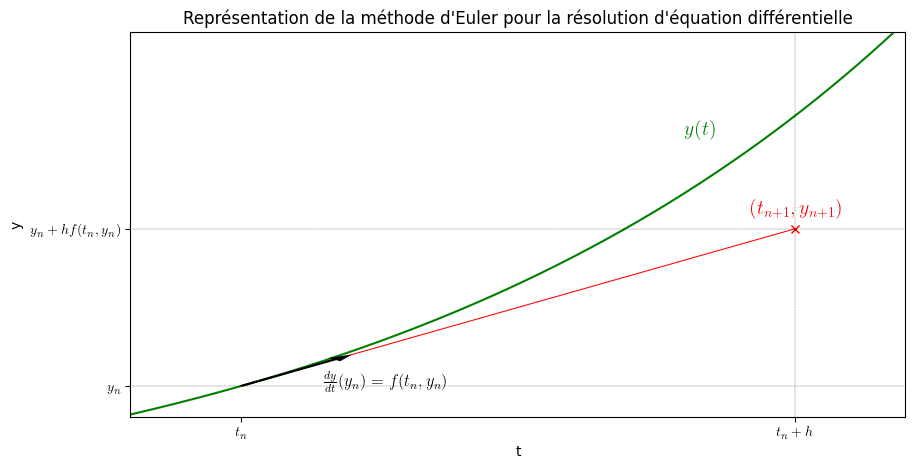

In [3]:
fig = plt.figure(figsize=(10, 5))
ax = fig.subplots()

# On créé une courbe d'exemple, ici y(x) = exp(x)
ax.plot([0.001*x-0.2 for x in range(1500)], [exp(0.001*x-0.2) for x in range(1500)], color = "green")
ax.annotate("$ y(t)$", xy=(0.8, 2.6), usetex=True, fontsize="x-large", color = "green")

# On dessine la tangente au point n
ax.arrow(x=0, y=1, dx=.2, dy=.2, width=.01, facecolor='black', edgecolor='none', length_includes_head=True, zorder=3) 
ax.annotate("$ \\frac{dy}{dt} (y_n) = f(t_n , y_n)$", xy=(0.15, 1), usetex=True, fontsize="large", color = "black")

# On ajoute les repères et annotations du point n+1
ax.plot([0.001*x for x in range(1000)], [(0.001*x)+1 for x in range(1000)], linewidth=0.75, color="red")
ax.plot(1, 2, marker="x", color = "red")
ax.annotate("$ (t_{n+1}, y_{n+1})$", xy=(0.92, 2.1), usetex=True, fontsize="x-large", color = "red")


# On créé des lignes horizontales et verticales pour mieux se repérer sur les axes
plt.axhline(1, linestyle="--", color="black", linewidth=0.2)
plt.axhline(2, linestyle="--", color="black", linewidth=0.2)
plt.axvline(1, linestyle="--", color="black", linewidth=0.2)

# On définie les axes avec des annotation personalisées
ax.set_xticks([0, 1])
ax.set_xticklabels(["$t_n$", "$t_n + h$"], minor=False, usetex=True)
ax.set_yticks([1, 2])
ax.set_yticklabels(["$y_n$", "$y_n + hf(t_n, y_n)$"], minor=False, usetex=True)

# On définit la taille du graphique
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(0.8, 3.25)

# On ajoute un titre et on le dessine
ax.set_title("Représentation de la méthode d'Euler pour la résolution d'équation différentielle")
ax.set_ylabel("y")
ax.set_xlabel("t")
plt.show()

On peut résumer la méthode avec ce système:
$$
        (S) = \begin{cases}
    		y_{n+1} &= y_n + h \frac{dy}{dt}(y_n) = y_n + h f(t_n, y_n) \\
            y_0 &= \alpha
    	\end{cases}
$$



#### II- Runge-Kutta (RK)

La méthode de RK,ici d'ordre 4 (RK4), définie dans la procédure `rk4`



In [4]:
def rk4(f,x0, y0, h, N):
    """
    Pour une fonction f(y) donnée, retourne la liste des N premiers termes de la résolution 
    par la methode de Runge-Kutta d'ordre 4 avec un pas de h et les conditions intitiales x(0) = x0 et y(x0) = y0
    """
    Y = [y0]
    for i in range(N):
# Calcul des coefficien de Runge-Kutta
        k1 = f(x0 + i*h, Y[-1])
        k2 = f(x0 + i*h, Y[-1] + h/2*k1)
        k3 = f(x0 + i*h, Y[-1] + h/2*k2)
        k4 = f(x0 + i*h, Y[-1] + h/2*k3)
# Calcul du n-ième terme
        y = Y[-1] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
        Y.append(y)
    return Y

Cette méthode approche la courbe avec plusieurs tangentes en chaque point, ici 4, d'où la nomenclature RK4.
On trouve le point n+1 en faisant une moyenne pondérée de ces tangentes.

Pour représenter la méthode plus visuellement on dessine le schéma ci\-dessous.


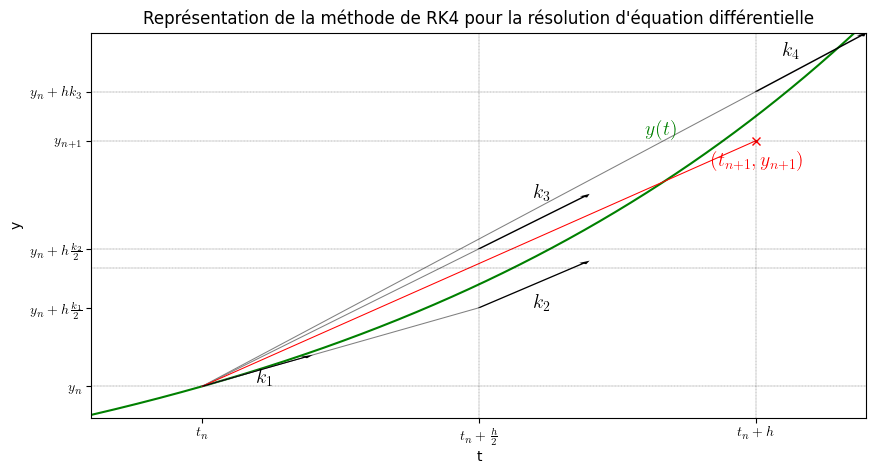

In [5]:
fig = plt.figure(figsize=(10, 5))
ax = fig.subplots()

# On créé une courbe d'exemple, ici y(x) = exp(x)
ax.plot([0.001*x-0.2 for x in range(1500)], [exp(0.001*x-0.2) for x in range(1500)], color = "green")
ax.annotate("$ y(t)$", xy=(0.8, 2.6), usetex=True, fontsize="x-large", color = "green")

# On dessine la tangente au point n
ax.arrow(x=0, y=1, dx=.2, dy=.2, width=.005, facecolor='black', edgecolor='none', length_includes_head=True, zorder=3)
ax.annotate("$k_1$", xy=(0.1, 1.02), usetex=True, fontsize="x-large")

# On dessine la les pentes qui servent de coefficients
ax.plot([0.001*x for x in range(500)], [(0.001*x)+1 for x in range(500)], linewidth=0.75, color="gray")
ax.arrow(x=.5, y=1.5, dx=.2, dy=.3, width=.005, facecolor='black', edgecolor='none', length_includes_head=True, zorder=3)
ax.annotate("$k_2$", xy=(0.6, 1.5), usetex=True, fontsize="x-large")

ax.plot([0.001*x for x in range(500)], [(0.00175*x)+1 for x in range(500)], linewidth=0.75, color="gray")
ax.arrow(x=.5, y=1.875, dx=.2, dy=.35, width=.005, facecolor='black', edgecolor='none', length_includes_head=True, zorder=3)
ax.annotate("$k_3$", xy=(0.6, 2.2), usetex=True, fontsize="x-large")

ax.plot([0.001*x for x in range(1000)], [(0.001875*x)+1 for x in range(1000)], linewidth=0.75, color="gray")
ax.arrow(x=1, y=2.875, dx=.2, dy=.375, width=.005, facecolor='black', edgecolor='none', length_includes_head=True, zorder=3)
ax.annotate("$k_4$", xy=(1.05, 3.1), usetex=True, fontsize="x-large")



# On ajoute les repères et annotations du point n+1
ax.plot([0.001*x for x in range(1000)], [(0.0015625*x)+1 for x in range(1000)], linewidth=0.75, color="red")
ax.plot(1, 2.5625, marker="x", color = "red")
ax.annotate("$ (t_{n+1}, y_{n+1})$", xy=(0.92, 2.4), usetex=True, fontsize="x-large", color = "red")

# On créé des lignes horisontales et verticales pour mieux se repérer sur les axes
ax.axhline(1, linestyle="--", color="black", linewidth=0.2)
ax.axhline(1.75, linestyle="--", color="black", linewidth=0.2)
ax.axhline(1.875, linestyle="--", color="black", linewidth=0.2)
ax.axhline(2.5625, linestyle="--", color="black", linewidth=0.2)
ax.axhline(2.875, linestyle="--", color="black", linewidth=0.2)
ax.axvline(1, linestyle="--", color="black", linewidth=0.2)
ax.axvline(.5, linestyle="--", color="black", linewidth=0.2)

# On définie les axes avec des annotation personalisées
ax.set_xticks([0, .5, 1])
ax.set_xticklabels(["$t_n$", "$t_n + \\frac{h}{2}$", "$t_n + h$"], minor=False, usetex=True)
ax.set_yticks([1, 1.5, 1.875, 2.5625, 2.875])
ax.set_yticklabels(["$y_n$", "$y_n + h \\frac{k_1}{2}$", "$y_n + h \\frac{k_2}{2}$", "$y_{n+1}$", "$y_n + h k_3$"], minor=False, usetex=True)

# On définie la taille du graphique
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(0.8, 3.25)

# On ajoute un titre et on le dessine
ax.set_title("Représentation de la méthode de RK4 pour la résolution d'équation différentielle")
ax.set_ylabel("y")
ax.set_xlabel("t")
plt.show()

On peut résumer la méthode comme ceci:
$$
        (S) = \begin{cases}
    		y_{n+1} &= y_n + \frac{h}{6}(k_1 + 2k_2 +2k_3 + k_4) \\
            y_0 &= \alpha
    	\end{cases}
$$
avec: 
$$
\begin{cases}
k_1 &= f \left( t_n, y_n \right)\\
k_2 &= f \left( t_n + \frac{h}{2}, y_n + \frac{h}{2} k_1 \right)\\
k_3 &= f \left( t_n + \frac{h}{2}, y_n + \frac{h}{2} k_2 \right) \\
k_4 &= f \left( t_n + h, y_n + h k_3\right)
\end{cases}
$$



#### III- Tests

Pour tester les différentes méthodes on tentera d'approcher y\(x\) = tan\(x\), en résolvant le problème de Cauchy suivant :

\begin{cases}
y' = 1+y^2 \\
y(0) = 0
\end{cases}



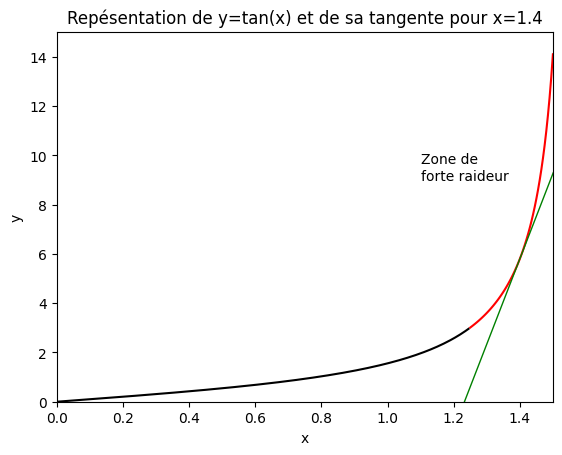

In [6]:
h = 0.005
N = 300

# Calcul des abscisses
X = [n*h for n in range(N+1)]

_, ax = plt.subplots()

# Affichage de la zone faiblement raide
ax.plot(X[:250], [tan(x) for x in X[:250]], color="black")

# Affichage et annotation de la zone fortement raide
ax.plot(X[250:], [tan(x) for x in X[250:]], color="red")
ax.annotate("Zone de  \nforte raideur", xy=(1.1, 9))

# Affichage de la tangente
ax.plot([0.001*x for x in range(1600)], [34.62*(0.001*x) -42.67 for x in range(1600)], linewidth=1, color="green")

# On définie la taille du graphique
ax.set_xlim(0, 1.5)
ax.set_ylim(0, 15)

# On ajoute un titre et on le dessine
ax.set_title("Repésentation de y=tan(x) et de sa tangente pour x=1.4")
ax.set_ylabel("y")
ax.set_xlabel("x")
plt.show()

On représente les approximation des deux méthodes, en mesurant le temps de calcul.
Pour ce faire on définie la commande `mesure` qui nous renvoie l'erreur de l'approximation avec la solution exacte et le temps de calcul dans l'unité adapté.



In [7]:
def mesure( methode: callable, solution: callable, **kwargs):

    # Mesure du temps de calcul (plusieurs iteration pour avoir un chiffre qui a du sens)
    T = []
    for _ in range(10):
        debut = time.perf_counter_ns()
        approx = methode(**kwargs)
        T.append(time.perf_counter_ns() - debut)

    # Calcul des incertitudes (à 95%)
    temps = sum(T)/len(T)
    s2 = sum([(temps - t)**2 for t in T]) / (len(T)-1)
    u = 2 * (s2/len(T))**(1/2)

    # Choix de l'unité la plus adapté
    UNITES = ("ns", "µs", "ms", "s")
    unite = 0
    while temps/1e3 > 1:
        temps /= 1e3
        u /= 1000
        unite += 1

    # Calcul de l'erreur maximale avec la solution exacte
    err_max = 0
    for i in range(kwargs["N"]):
        err = abs(solution(kwargs["x0"] + i * kwargs["h"]) - approx[i])
        if err > err_max : err_max = err
    return approx, (temps, u, UNITES[unite]), err_max

On représente sur un graphique pour comparaison, la solution exacte et les approximations.

On décide de représenter les solutions sur l'intervalle $[0; 1,5]$ avec 300 points calculés.



Euler: 
	 erreur max: 1.813 
	 temps de calcul: 310.0 ± 72.455 µs
RK4: 
	 erreur max: 0.357 
	 temps de calcul: 1.3 ± 0.458 ms


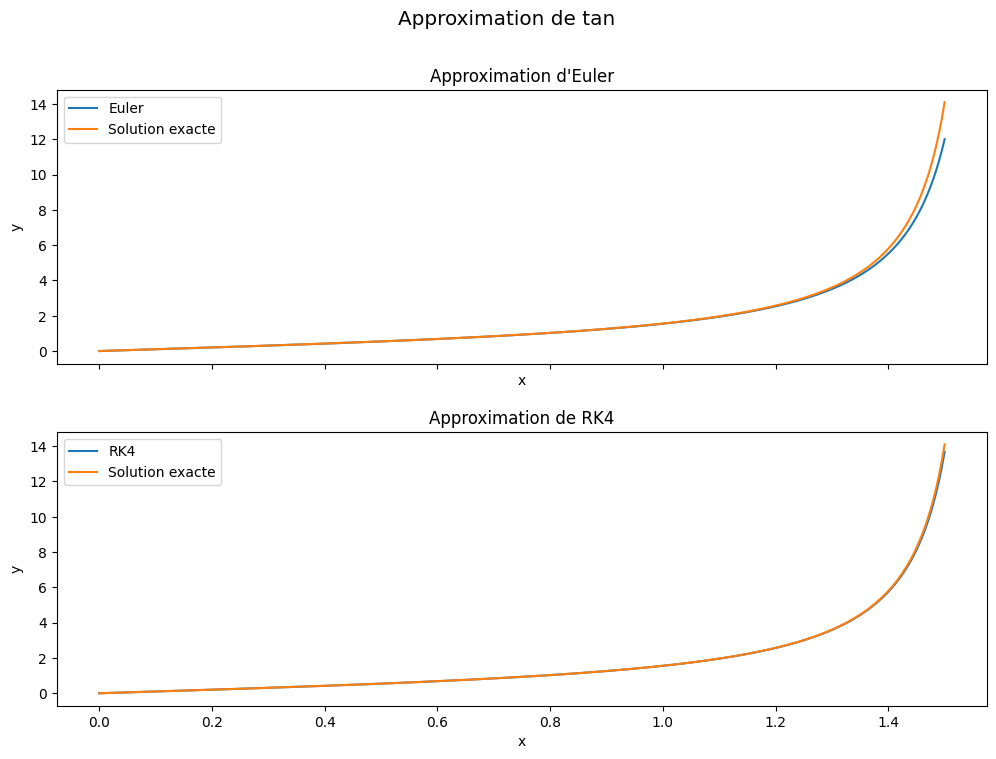

In [8]:
# Définition de l'équation differentielle
f = lambda t, y: 1 + y**2

# paramètres de resolution
x0, y0 = 0, 0
h = 0.005
N = 300

# Calcul et mesure des méthodes
X = [n*h for n in range(N+1)]

E, E_temps, E_err = mesure(euler, tan, f=f, x0=x0, y0=y0, h=h, N=N)
print(f"Euler: \n\t erreur max: {E_err:.3f} \n\t temps de calcul: {E_temps[0]:.1f} ± {E_temps[1]:.3f} {E_temps[2]}")

RK, RK_temps, RK_err = mesure(rk4, tan, f=f, x0=x0, y0=y0, h=h, N=N)
print(f"RK4: \n\t erreur max: {RK_err:.3f} \n\t temps de calcul: {RK_temps[0]:.1f} ± {RK_temps[1]:.3f} {RK_temps[2]}")

# Définition du graphique 
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(2, hspace=0.25)
axs = gs.subplots(sharex=True)
fig.suptitle('Approximation de tan', fontsize="x-large")

# Graphique d'Euler
axs[0].set_title("Approximation d'Euler")
axs[0].plot(X, E, label= "Euler") 
axs[0].plot(X, [tan(x) for x in X], label="Solution exacte") 
axs[0].set_ylabel("y")
axs[0].set_xlabel("x")

# Graphique de RK
axs[1].set_title("Approximation de RK4")
axs[1].plot(X, RK, label="RK4")
axs[1].plot(X, [tan(x) for x in X], label="Solution exacte") 
axs[1].set_ylabel("y")
axs[1].set_xlabel("x")

# Affichage des graphiques
axs[0].legend()
axs[1].legend()
plt.show()

Pour réduire les temps de calculs, augmentons la taille du pas et regardons les effets.

On décide de prendre 60 points distants de 0.025 sur le même intervalle, $[0, 1.5]$.


Euler: 
	 erreur max: 3.455 
	 temps de calcul: 62.5 ± 3.750 µs
RK4: 
	 erreur max: 0.901 
	 temps de calcul: 190.2 ± 22.028 µs


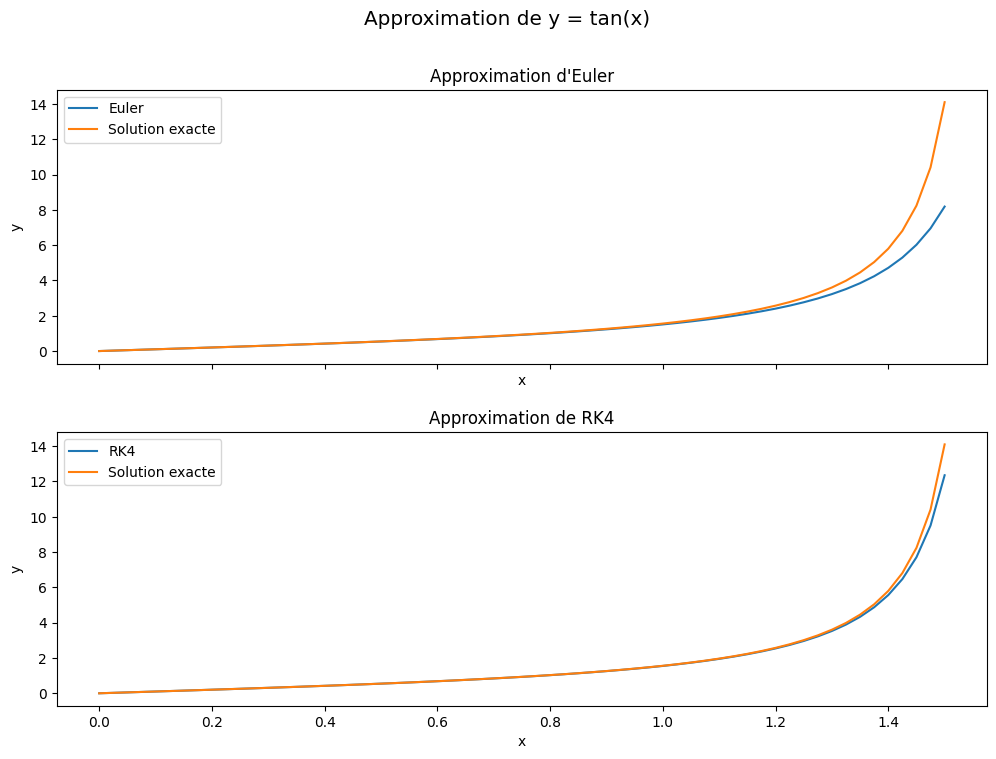

In [9]:
# Définition de l'équation differentielle
f = lambda t, y: 1 + y**2

# paramètres de resolution
x0, y0 = 0, 0
h = 0.025
N = 60

# Calcul et mesure des méthodes
X = [n*h for n in range(N+1)]

E, E_temps, E_err = mesure(euler, tan, f=f, x0=x0, y0=y0, h=h, N=N)
print(f"Euler: \n\t erreur max: {E_err:.3f} \n\t temps de calcul: {E_temps[0]:.1f} ± {E_temps[1]:.3f} {E_temps[2]}")

RK, RK_temps, RK_err = mesure(rk4, tan, f=f, x0=x0, y0=y0, h=h, N=N)
print(f"RK4: \n\t erreur max: {RK_err:.3f} \n\t temps de calcul: {RK_temps[0]:.1f} ± {RK_temps[1]:.3f} {RK_temps[2]}")

# Définition du graphique 
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(2, hspace=0.25)
axs = gs.subplots(sharex=True)
fig.suptitle('Approximation de y = tan(x)', fontsize="x-large")

# Graphique d'Euler
axs[0].set_title("Approximation d'Euler")
axs[0].plot(X, E, label= "Euler") 
axs[0].plot(X, [tan(x) for x in X], label="Solution exacte") 
axs[0].set_ylabel("y")
axs[0].set_xlabel("x")


# Graphique de RK
axs[1].set_title("Approximation de RK4")
axs[1].plot(X, RK, label="RK4")
axs[1].plot(X, [tan(x) for x in X], label="Solution exacte") 
axs[1].set_ylabel("y")
axs[1].set_xlabel("x")

# Affichage des graphiques
axs[0].legend()
axs[1].legend()
plt.show()

Le temps de calcul a été considérablement réduit, mais les approximations se sont grandement éloignées de la solution exacte.



### 1.2- Systèmes d'équations différentielles à 2 équations 

Les méthode de résolutions numériques utilisées dans le [1.1\- Équations différentielles à 1 fonction](#1.1--%C3%89quations-diff%C3%A9rentielles-%C3%A0-1-fonction) peuvent aussi être utilisées pour des résolutions de systèmes à n équations.
Pour simplifier les calculs nous nous limiterons dans cette partie à 2 équations.

On redéfinie donc 2 nouvelles fonctions `euler_2D` et `RK_2D`, sur les bases des fonctions `euler` et `RK`, respectivement. 

On redéfinie aussi une nouvelle fonction `mesure_2D` sur la base de la fonction `mesure`.



In [10]:
def euler_2D(f, g, x0, y0, t0, h, N):
    """
    Pour une fonction f(x(t), y(t), t) donnée, retourne la liste des N premiers termes de la résolution 
    par la methode d'Euler, avec un pas de h et les conditions intitiales x(0) = x0 et y(0) = y0
    """
    X = [x0]
    Y = [y0]
    t = t0
    for _ in range(N):
        t += h
        X.append(X[-1] + h*f(t, X[-1], Y[-1]))
        Y.append(Y[-1] + h*g(t, X[-1], Y[-1]))
    return (X,Y)


def rk4_2D(f, g, x0, y0, t0, h, N):
    """
    Pour une fonction f(x(t), y(t), t) donnée, retourne la liste des N premiers termes de la résolution
    par la methode de Runge-Kutta d'ordre 4 avec un pas de h et les conditions intitiales x(0) = x0 et y(0) = y0
    """
    X = [x0]
    Y = [y0]
    t = t0
    for _ in range(N):
# On avance le temps de h
        t += h
# Calcul des coefficienrts de Runge-Kutta
        k1 = f(t, X[-1], Y[-1])
        l1 = g(t, X[-1], Y[-1])
        
        k2 = f(t, X[-1] + h/2 * k1, Y[-1] + h/2*l1)
        l2 = g(t, X[-1] + h/2 * k1, Y[-1] + h/2*l1)
        
        k3 = f(t, X[-1] + h/2 * k2, Y[-1] + h/2*l2)
        l3 = g(t, X[-1] + h/2 * k2, Y[-1] + h/2*l2)
        
        k4 = f(t, X[-1] + h/2 * k3, Y[-1] + h/2*l3)
        l4 = g(t, X[-1] + h/2 * k3, Y[-1] + h/2*l3)
# Calcul du n-ième terme
        x = X[-1] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
        X.append(x)
        y = Y[-1] + h/6 * (l1 + 2*l2 + 2*l3 + l4)
        Y.append(y)
    return (X, Y)


def mesure_2D( methode: callable, solution: list[callable], **kwargs):

    # Mesure du temps de calcul (plusieurs iteration pour avoir un chiffre qui a du sens)
    T = []
    for _ in range(10):
        debut = time.perf_counter_ns()
        approx = methode(**kwargs)
        T.append(time.perf_counter_ns() - debut)

    # Calcul des incertitudes (à 95%)
    temps = sum(T)/len(T)
    s2 = sum([(temps - t)**2 for t in T]) / (len(T)-1)
    u = 2 * (s2/len(T))**(1/2)

    # Choix de l'unité la plus adapté
    UNITES = ("ns", "µs", "ms", "s")
    unite = 0
    while temps/1e3 > 1:
        temps /= 1e3
        u /= 1000
        unite += 1

    # Calcul de l'erreur maximale avec la solution exacte
    err_max_x = 0
    for i in range(kwargs["N"]):
        err = abs(solution[0](kwargs["t0"] + i * kwargs["h"]) - approx[0][i])
        if err > err_max_x : err_max_x = err
    err_max_y = 0
    for i in range(kwargs["N"]):
        err = abs(solution[1](kwargs["t0"] + i * kwargs["h"]) - approx[1][i])
        if err > err_max_y : err_max_y = err
    return approx, (temps, u,UNITES[unite]), err_max_x, err_max_y

On utilisera, dans un premier temps, comme illustration le système:
$$
	\begin{cases}
        x' &= x + y \\
		y' &= x - y
	\end{cases}
$$
avec comme conditions initiales:
$$
\begin{cases}
    x(0) &= 2 \\
    y(0) &= -2
\end{cases}
$$

Par des calculs matriciels non détaillés ici, on obtient:

\begin{cases}
    x(t) &= e^{\sqrt{2}t} + e^{-\sqrt{2}t} \\
    y(t) &= (\sqrt{2} - 1) e^{\sqrt{2}t} -(1+\sqrt{2}) e^{-\sqrt{2}t}
\end{cases}


On décide de représenter les approximations et les solutions exactes pour chaque méthode sur l'intervalle $[0; 2]$ avec un pas de $0,01$.


Euler: 
	 erreur max sur x: 0.223 
	 erreur max sur y: 0.008 
	 temps de calcul: 286.1 ± 63.062 µs
RK4: 
	 erreur max sur x: 0.055 
	 erreur max sur y: 0.022 
	 temps de calcul: 770.2 ± 221.552 µs


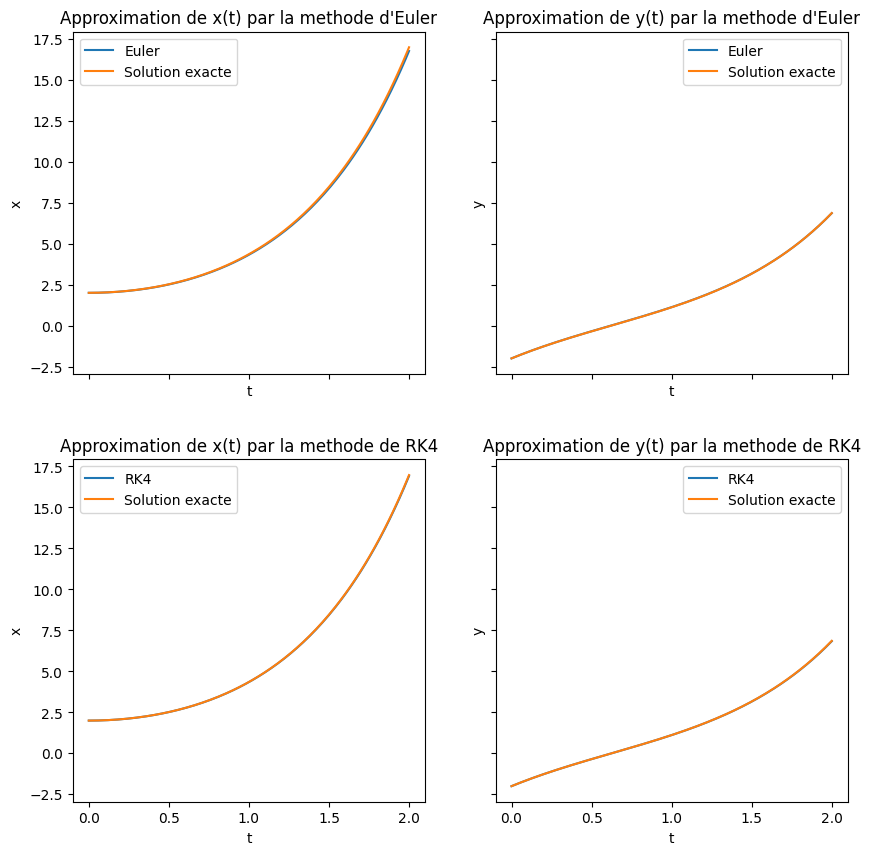

In [31]:
# définition des équadiffs
f = lambda t, x, y: x + y
g = lambda t, x, y: x - y

# paramètres de resolution
x0 = 2
y0 = -2
t0 = 0
h = 0.01
N = 200

# Abscisses calculés
T = [n*h for n in range(t0, N+1)]

# Définition des solutions exactes
x = lambda t: exp(sqrt(2) * t) + exp(-sqrt(2) * t)
y = lambda t: (sqrt(2)-1)*exp(sqrt(2)*t)+ (-sqrt(2)-1)*exp(-sqrt(2)*t)

# Calcul des ordonées pour chaque abscisse
E, E_temps, E_err_x, E_err_y = mesure_2D(euler_2D, [x, y], f=f, g=g, x0=x0, y0=y0, t0=t0, h=h, N=N)
print(f"Euler: \n\t erreur max sur x: {E_err_x:.3f} \n\t erreur max sur y: {E_err_y:.3f} "\
      f"\n\t temps de calcul: {E_temps[0]:.1f} ± {E_temps[1]:.3f} {E_temps[2]}")
RK, RK_temps, RK_err_x, RK_err_y = mesure_2D(rk4_2D, [x, y], f=f, g=g, x0=x0, y0=y0, t0=t0, h=h, N=N)
print(f"RK4: \n\t erreur max sur x: {RK_err_x:.3f} \n\t erreur max sur y: {RK_err_y:.3f} "\
      f"\n\t temps de calcul: {RK_temps[0]:.1f} ± {RK_temps[1]:.3f} {RK_temps[2]}")

# Définition du graphique 
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(2, 2, hspace=0.25)
axs = gs.subplots(sharex=True, sharey=True)

# Graphique d'Euler
axs[0, 0].set_title("Approximation de x(t) par la methode d'Euler")
axs[0, 0].plot(T, E[0], label= "Euler") 
axs[0, 0].plot(T, [x(t) for t in T], label="Solution exacte") 
axs[0, 0].set_ylabel("x")
axs[0, 0].set_xlabel("t")


axs[0, 1].set_title("Approximation de y(t) par la methode d'Euler")
axs[0, 1].plot(T, E[1], label= "Euler") 
axs[0, 1].plot(T, [y(t) for t in T], label="Solution exacte") 
axs[0, 1].set_ylabel("y")
axs[0, 1].set_xlabel("t")


# Graphique de RK
axs[1, 0].set_title("Approximation de x(t) par la methode de RK4")
axs[1, 0].plot(T, RK[0], label="RK4")
axs[1, 0].plot(T, [x(t) for t in T], label="Solution exacte") 
axs[1, 0].set_ylabel("x")
axs[1, 0].set_xlabel("t")


axs[1, 1].set_title("Approximation de y(t) par la methode de RK4")
axs[1, 1].plot(T, RK[1], label="RK4")
axs[1, 1].plot(T, [y(t) for t in T], label="Solution exacte") 
axs[1, 1].set_ylabel("y")
axs[1, 1].set_xlabel("t")


# Affichage des graphiques
axs[0, 0].legend()
axs[0, 1].legend()
axs[1, 0].legend()
axs[1, 1].legend()
plt.show()

Les équation n'étant pas très raides, les approximations numériques sont plutôt fidèles aux solutions exactes.


On utilisera maintenant le système:
$$
	\begin{cases}
        x' &= 10x + 70y \\
		y' &= 10x - 50y
	\end{cases}
$$
avec comme conditions initiales:
$$
\begin{cases}
    x(0) &= 60 \\
    y(0) &= 20
\end{cases}
$$

Par des calculs matriciels non détaillés ici, on obtient:

\begin{cases}
    x(t) &= 70e^{20t} - 10e^{-60t} \\
    y(t) &= 10e^{20t} + 10e^{-60t}
\end{cases}

Les termes en $e^{20t}$ et $e^{-60t}$ vont raidir les équations différentielles.

On trace les solutions sur l'intervalle $[0; 0,2]$ avec un  pas de $0,01$.
Comme il s'agit de la même taille de pas qu'avant, nous pouvons plus facilement comparer les approximations dans des conditions de faible et forte raideur. Nous nous limiterons qu'a 10% de l'intervalle étudié précédemment pour éviter de dépasser la limite maximale des nombre python, cette limite étant facilement atteinte avec des termes en $e^{20t}$.


Euler: 
	 erreur max sur x: 173.464 
	 erreur max sur y: 54.173 
	 temps de calcul: 31.3 ± 22.325 µs
RK4: 
	 erreur max sur x: 175.400 
	 erreur max sur y: 25.057 
	 temps de calcul: 133.9 ± 62.839 µs


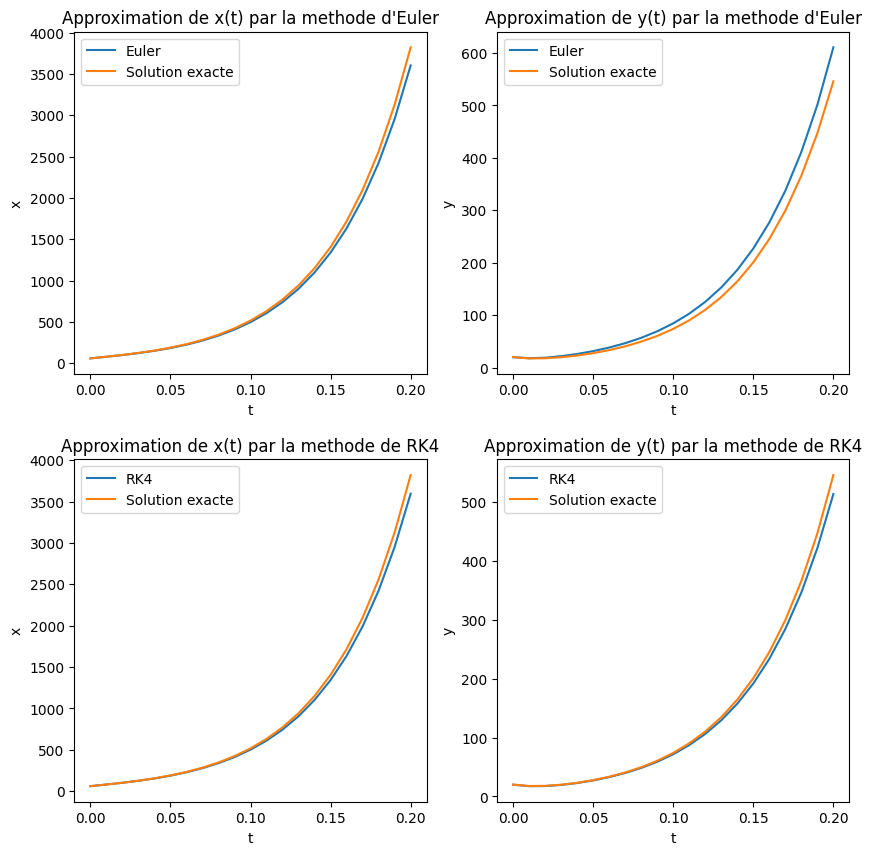

In [12]:
# définition des équadiffs
f = lambda t, x, y: 10*x + 70*y
g = lambda t, x, y: 10*x - 50*y

# paramètres de resolution
x0 = 60
y0 = 20
t0 = 0
h = 0.01
N = 20

# Abscisses calculés
T = [n*h for n in range(t0, N+1)]

# Définition des solutions exactes
x = lambda t: 70 * exp(20*t) - 10 * exp(-60*t)
y = lambda t: 10 * exp(20*t) + 10 * exp(-60*t)

# Calcul des ordonées pour chaque abscisse
E, E_temps, E_err_x, E_err_y = mesure_2D(euler_2D, [x, y], f=f, g=g, x0=x0, y0=y0, t0=t0, h=h, N=N)
print(f"Euler: \n\t erreur max sur x: {E_err_x:.3f} \n\t erreur max sur y: {E_err_y:.3f} "\
      f"\n\t temps de calcul: {E_temps[0]:.1f} ± {E_temps[1]:.3f} {E_temps[2]}")
RK, RK_temps, RK_err_x, RK_err_y = mesure_2D(rk4_2D, [x, y], f=f, g=g, x0=x0, y0=y0, t0=t0, h=h, N=N)
print(f"RK4: \n\t erreur max sur x: {RK_err_x:.3f} \n\t erreur max sur y: {RK_err_y:.3f} "\
      f"\n\t temps de calcul: {RK_temps[0]:.1f} ± {RK_temps[1]:.3f} {RK_temps[2]}")

# Définition du graphique 
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(2, 2, hspace=0.25)
axs = gs.subplots(sharex=True, sharey=True)

# Graphique d'Euler
axs[0, 0].set_title("Approximation de x(t) par la methode d'Euler")
axs[0, 0].plot(T, E[0], label= "Euler") 
axs[0, 0].plot(T, [x(t) for t in T], label="Solution exacte") 
axs[0, 0].set_ylabel("x")
axs[0, 0].set_xlabel("t")


axs[0, 1].set_title("Approximation de y(t) par la methode d'Euler")
axs[0, 1].plot(T, E[1], label= "Euler") 
axs[0, 1].plot(T, [y(t) for t in T], label="Solution exacte") 
axs[0, 1].set_ylabel("y")
axs[0, 1].set_xlabel("t")


# Graphique de RK
axs[1, 0].set_title("Approximation de x(t) par la methode de RK4")
axs[1, 0].plot(T, RK[0], label="RK4")
axs[1, 0].plot(T, [x(t) for t in T], label="Solution exacte") 
axs[1, 0].set_ylabel("x")
axs[1, 0].set_xlabel("t")


axs[1, 1].set_title("Approximation de y(t) par la methode de RK4")
axs[1, 1].plot(T, RK[1], label="RK4")
axs[1, 1].plot(T, [y(t) for t in T], label="Solution exacte") 
axs[1, 1].set_ylabel("y")
axs[1, 1].set_xlabel("t")


# Affichage des graphiques
axs[0, 0].legend()
axs[0, 1].legend()
axs[1, 0].legend()
axs[1, 1].legend()
plt.show()

On remarque ici que les approximations s'éloignent grandement des solutions exactes sur ce petit intervalle.



Nous avons vu tout au long du [1- Généralités](#1--Généralités) que la raideur des équations différentielles est un problème majeur quand à la fiabilité des approximations numérique de celles-ci. Ici nous testons ces approximations sur des intervalles relativement courts et nous obtenons déjà de grands écarts avec les solutions exactes.

Il est donc nécessaire de trouver d'autres méthodes qui peuvent résoudre ces problèmes de raideur pour pouvoir avoir confiance en ces approximations.



## 2- Méthodes adaptées

Les méthodes classiques, Euler et Runge\-Kutta, forment une bonne approximation si les équations ne sont pas trop raides et en prenant un pas assez fin.

### 2.1\- Runge\-Kutta\-Fehlberg

Une des idées pour pour trouver une méthode plus adaptée aux équations différentielles raides, serait de pouvoir adapter le pas en fonction de la raideur locale de la solution.
C'est le principe des méthodes Runge\-Kutta\-Fehlberg qui sont dérivées des méthodes Runge\-Kutta. En estimant l'erreur sur l'approximation, on décide de réduire le pas \(si l'erreur est supérieure à la tolérance\), ou de l'augmenter \(si l'erreur est inférieur à la tolérance\) pour réduire le temps de calcul.
On définie une nouvelle fonction `rkf` qui utilise cette méthode. Étant donné que la taille du pas n'est pas uniforme on ne peut pas utiliser la méthode `mesure`, on définit donc aussi la méthode `mesure_rkf` pour mesurer les performances de la méthode `rkf`.



In [13]:
def rkf(f, y0, t0, hmin, hmax, eps, tmax):
    """Approximation numérique à pas variable avec la methode RKF45"""

    def _prochain(t, y):
        """Calcul des coefficients"""
        k1 = h * f(t, y)
        k2 = h * f(t + (1 / 4) * h, y + (1 / 4) * k1)
        k3 = h * f(t + (3 / 8) * h, y + (3 / 32) * k1 + (9 / 32) * k2)
        k4 = h * f(
            t + (12 / 13) * h,
            y + (1932 / 2197) * k1 - (7200 / 2197) * k2 + (7296 / 2197) * k3,
        )
        k5 = h * f(
            t + h,
            y
            + (439 / 216) * k1
            - 8 * k2
            + (3680 / 513) * k3
            - (845 / 4104) * k4,
        )
        k6 = h * f(
            t + (1 / 2) * h,
            y
            - (8 / 27) * k1
            + 2 * k2
            - (3544 / 2565) * k3
            + (1859 / 4104) * k4
            - (11 / 40) * k5,
        )

        RK4 = (
            y
            + (25 / 216) * k1
            + (1408 / 2565) * k3
            + (2197 / 4104) * k4
            - (1 / 5) * k5
        )
        RK5 = (
            y
            + (16 / 135) * k1
            + (6656 / 12825) * k3
            + (28561 / 56430) * k4
            - (9 / 50) * k5
            + (2 / 55) * k6
        )

        TRE = abs(RK5 - RK4)
        return (k1, k2, k3, k4, k5, k6), TRE

    # Liste qui contient les point claculés
    y = [y0]
    t = [t0]
    h = hmax

    while t[-1] < tmax:
        if h < hmin:
            h = hmin
        if h > hmax:
            h = hmax

        K, TRE = _prochain(t[-1], y[-1])

        if TRE < eps:
            h *= 2
            K, TRE = _prochain(t[-1], y[-1])

        while TRE >= eps:
            h /= 2
            K, TRE = _prochain(t[-1], y[-1])

        k1, k2, k3, k4, k5, k6 = K
        t.append(t[-1] + h)
        y.append(
            y[-1]
            + (25 / 216) * k1
            + (1408 / 2565) * k3
            + (2197 / 4101) * k4
            - (1 / 5) * k5
        )

    return t, y

def mesure_rkf(methode: callable, solution: callable, **kwargs):

    # Mesure du temps de calcul (plusieurs iteration pour avoir un chiffre qui a du sens)
    T = []
    for _ in range(100):
        debut = time.perf_counter_ns()
        approx = methode(**kwargs)
        T.append(time.perf_counter_ns() - debut)

    # Calcul des incertitudes (à 95%)
    temps = sum(T)/len(T)
    s2 = sum([(temps - t)**2 for t in T]) / (len(T)-1)
    u = 2 * (s2/len(T))**(1/2)

    # Choix de l'unité la plus adapté
    UNITES = ("ns", "µs", "ms", "s")
    unite = 0
    while temps/1e3 > 1:
        temps /= 1e3
        u /= 1000
        unite += 1

    # Calcul de l'erreur maximale avec la solution exacte
    err_max = 0
    for i in range(len(approx[0])):
        err = abs(solution(approx[0][i]) - approx[1][i])
        if err > err_max : err_max = err
    return approx, (temps, u, UNITES[unite]), err_max

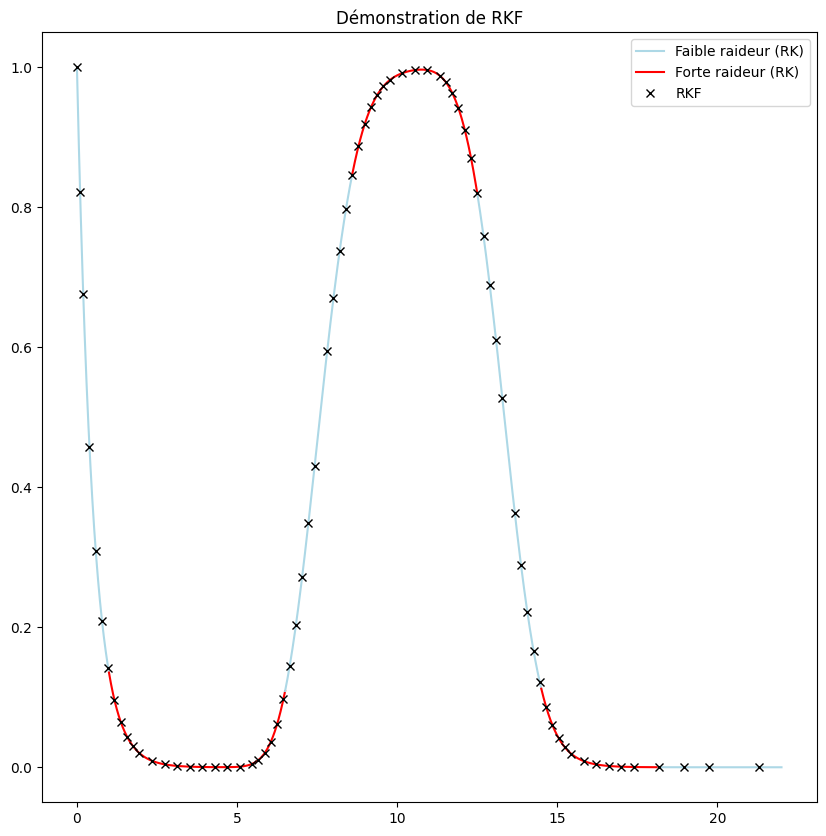

In [14]:
f = lambda t, y: -2*y + 2*exp(-0.01*(10-t)**4)
y0 = 1
h = 0.01
N = 100

RKF = rkf(f, 1, 0, h/10000, h*10000, h/1000, 20)
X, RK = [n*0.001 for n in range(22001)], rk4(f, 0, 1, 0.001, 22000)

fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(1)
axs = gs.subplots()

axs.plot(X[:1000], RK[:1000], label="Faible raideur (RK)", color="lightblue")
axs.plot(X[1000:6500], RK[1000:6500], label="Forte raideur (RK)", color='red')
axs.plot(X[6500:8600], RK[6500:8600], color="lightblue")
axs.plot(X[8600:12500], RK[8600:12500], color='red')
axs.plot(X[12500:14500], RK[12500:14500], color="lightblue")
axs.plot(X[14500:18164], RK[14500:18164], color='red')
axs.plot(X[18164:], RK[18164:], color='lightblue')
axs.plot(*RKF, marker='x', linestyle=" ", label = "RKF", color="black")

axs.legend()
axs.set_title("Démonstration de RKF")
plt.show()

On voit bien ici le pas du RKF qui varie en fonction de la raideur de la solution.



Euler: 
	 erreur max: 3.455 
	 temps de calcul: 42.3 ± 3.017 µs
RK4: 
	 erreur max: 0.901 
	 temps de calcul: 176.3 ± 7.692 µs
RKF: 
	 erreur max: 0.131 
	 temps de calcul: 275.9 ± 16.215 µs


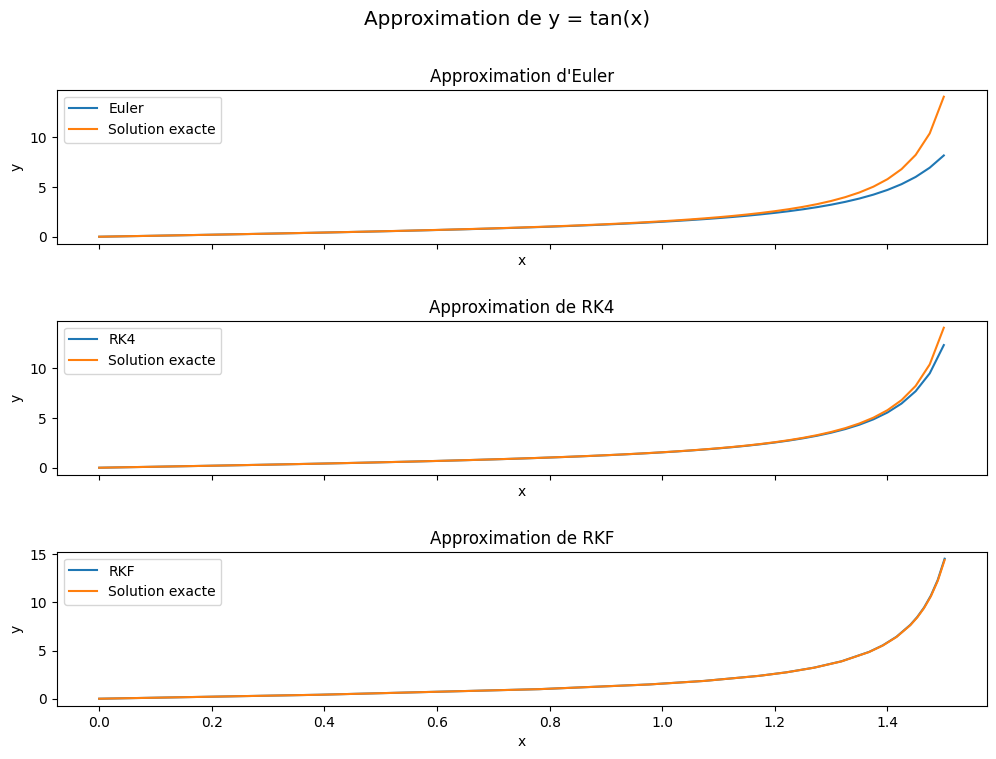

In [15]:
# Définition de l'équation differentielle
f = lambda t, y: 1 + y**2

# paramètres de resolution
x0, y0 = 0, 0
h = 0.025
N = 60

# Calcul et mesure des méthodes
X = [n*h for n in range(N+1)]

E, E_temps, E_err = mesure(euler, tan, f=f, x0=x0, y0=y0, h=h, N=N)
print(f"Euler: \n\t erreur max: {E_err:.3f} \n\t temps de calcul: {E_temps[0]:.1f} ± {E_temps[1]:.3f} {E_temps[2]}")

RK, RK_temps, RK_err = mesure(rk4, tan, f=f, x0=x0, y0=y0, h=h, N=N)
print(f"RK4: \n\t erreur max: {RK_err:.3f} \n\t temps de calcul: {RK_temps[0]:.1f} ± {RK_temps[1]:.3f} {RK_temps[2]}")

RKF, RKF_temps, RKF_err = mesure_rkf(rkf, tan, f=f, t0=x0, y0=y0, hmin=h/1000, hmax=h*1000, eps=h/1000, tmax=N*h)
print(f"RKF: \n\t erreur max: {RKF_err:.3f} \n\t temps de calcul: {RKF_temps[0]:.1f} ± {RKF_temps[1]:.3f} {RKF_temps[2]}")

# Définition du graphique 
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(3, hspace=0.5)
axs = gs.subplots(sharex=True)
fig.suptitle('Approximation de y = tan(x)', fontsize="x-large")

# Graphique d'Euler
axs[0].set_title("Approximation d'Euler")
axs[0].plot(X, E, label= "Euler") 
axs[0].plot(X, [tan(x) for x in X], label="Solution exacte") 
axs[0].set_ylabel("y")
axs[0].set_xlabel("x")

# Graphique de RK
axs[1].set_title("Approximation de RK4")
axs[1].plot(X, RK, label="RK4")
axs[1].plot(X, [tan(x) for x in X], label="Solution exacte") 
axs[1].set_ylabel("y")
axs[1].set_xlabel("x")

# Graphique de RKF
axs[2].set_title("Approximation de RKF")
axs[2].plot(*RKF, label="RKF")
axs[2].plot(RKF[0], [tan(t) for t in RKF[0]], label="Solution exacte")
axs[2].set_ylabel("y")
axs[2].set_xlabel("x")

# Affichage des graphiques
axs[0].legend()
axs[1].legend()
axs[2].legend()
plt.show()


On remarque l'utilité de la méthode RKF, elle permet d'avoir une grande précision sans trop augmenter le temps de calcul.



### 2.2- Méthodes multi-pas

Pour avoir une meilleur précision, une autre approche serait de ne plus se baser uniquement sur le point $y_{n-1}$ pour calculer $y_n$
Nous étudierons la méthode d'Adams\-Bashford \(AB\).
Cette méthode prend en compte les points antérieurs pour calculer un point, nous étudierons ici la méthode AB d'ordre 4, qui prend en compte 4 point antérieurs.


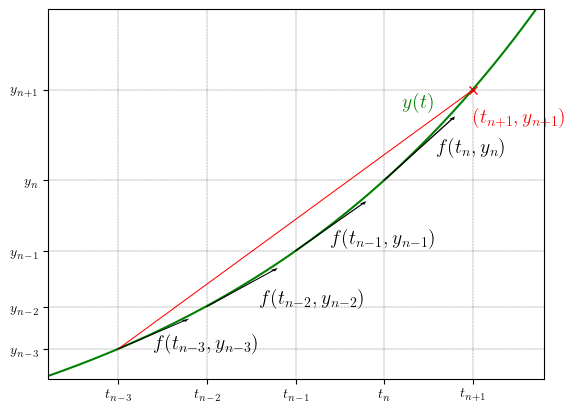

In [16]:
fig, ax1 = plt.subplots(1, 1)

# On créé une courbe d'exemple, ici y(x) = exp(x)
plt.plot([0.001*x-0.2 for x in range(1500)], [exp(0.001*x-0.2) for x in range(1500)], color = "green")
plt.annotate("$ y(t)$", xy=(0.8, 2.6), usetex=True, fontsize="x-large", color = "green")

# On dessine la tangente au point n-3
plt.arrow(x=0, y=1, dx=.2, dy=.2, width=.005, facecolor='black', edgecolor='none', length_includes_head=True, zorder=3) 
plt.annotate("$f(t_{n-3}, y_{n-3})$", xy=(0.1, 1), usetex=True, fontsize="x-large")

# On dessine la tangente au point n-2
plt.arrow(x=0.25, y=1.28, dx=.2, dy=.256, width=.005, facecolor='black', edgecolor='none', length_includes_head=True, zorder=3) 
plt.annotate("$f(t_{n-2}, y_{n-2})$", xy=(0.4, 1.3), usetex=True, fontsize="x-large")

# On dessine la tangente au point n-1
plt.arrow(x=0.5, y=1.65, dx=.2, dy=.329, width=.005, facecolor='black', edgecolor='none', length_includes_head=True, zorder=3) 
plt.annotate("$f(t_{n-1}, y_{n-1})$", xy=(0.6, 1.7), usetex=True, fontsize="x-large")

# On dessine la tangente au point n
plt.arrow(x=0.75, y=2.117, dx=.2, dy=.4234, width=.005, facecolor='black', edgecolor='none', length_includes_head=True, zorder=3) 
plt.annotate("$f(t_{n}, y_{n})$", xy=(0.9, 2.3), usetex=True, fontsize="x-large")

# On ajoute les repères et annotations du point n+1
plt.plot([0.001*x for x in range(1000)], [(0.001715*x)+1 for x in range(1000)], linewidth=0.75, color="red")
plt.plot(1, 2.715, marker="x", color = "red")
plt.annotate("$ (t_{n+1}, y_{n+1})$", xy=(1, 2.5), usetex=True, fontsize="x-large", color = "red")


# On créé des lignes horisontales et verticales pour mieux se repérer sur les axes
plt.axhline(1, linestyle="--", color="black", linewidth=0.2)
plt.axhline(1.28, linestyle="--", color="black", linewidth=0.2)
plt.axhline(1.65, linestyle="--", color="black", linewidth=0.2)
plt.axhline(2.117, linestyle="--", color="black", linewidth=0.2)
plt.axhline(2.715, linestyle="--", color="black", linewidth=0.2)
plt.axvline(0, linestyle="--", color="black", linewidth=0.2)
plt.axvline(0.25, linestyle="--", color="black", linewidth=0.2)
plt.axvline(0.5, linestyle="--", color="black", linewidth=0.2)
plt.axvline(0.75, linestyle="--", color="black", linewidth=0.2)
plt.axvline(1, linestyle="--", color="black", linewidth=0.2)


# On définie les axes avec des annotation personalisées
ax1.set_xticks([0,0.25,0.5, 0.75, 1])
ax1.set_xticklabels(["$t_{n-3}$", "$t_{n-2}$","$t_{n-1}$","$t_{n}$", "$t_{n+1}$"], minor=False, usetex=True)
ax1.set_yticks([1, 1.28,1.65, 2.117, 2.715])
ax1.set_yticklabels(["$y_{n-3}$", "$y_{n-2}$","$y_{n-1}$","$y_{n}$", "$y_{n+1}$"], minor=False, usetex=True)

# On définie la taille du graphique
plt.xlim(-0.2, 1.2)
plt.ylim(0.8, 3.25)

# On ajoute un titre et on le dessine
plt.title("")
plt.show()

On créé la fonction `ab4` qui utilise la methode AB d'ordre 4.

In [17]:
def ab4(f, x0, y0, h, N):

    # On approche les 4 premiers points en utilisant RK
    Y = rk4(f, x0, y0, h, 3)

    # Puis on calculs les autres point en utilisant les 4 point d'avant
    for i in range(3, N):
        y = Y[-1] + h*(
              (55/24)*f(i*h, Y[-1])
            - (59/24)*f((i-1)*h, Y[-2])
            + (37/24)*f((i-2)*h, Y[-3])
            -  (9/24)*f((i-3)*h, Y[-4])
        )
        Y.append(y)
    return Y   

Euler: 
	 erreur max: 1.813 
	 temps de calcul: 232.6 ± 32.436 µs
RK4: 
	 erreur max: 0.357 
	 temps de calcul: 929.6 ± 62.918 µs
AB4: 
	 erreur max: 0.002 
	 temps de calcul: 914.6 ± 71.503 µs


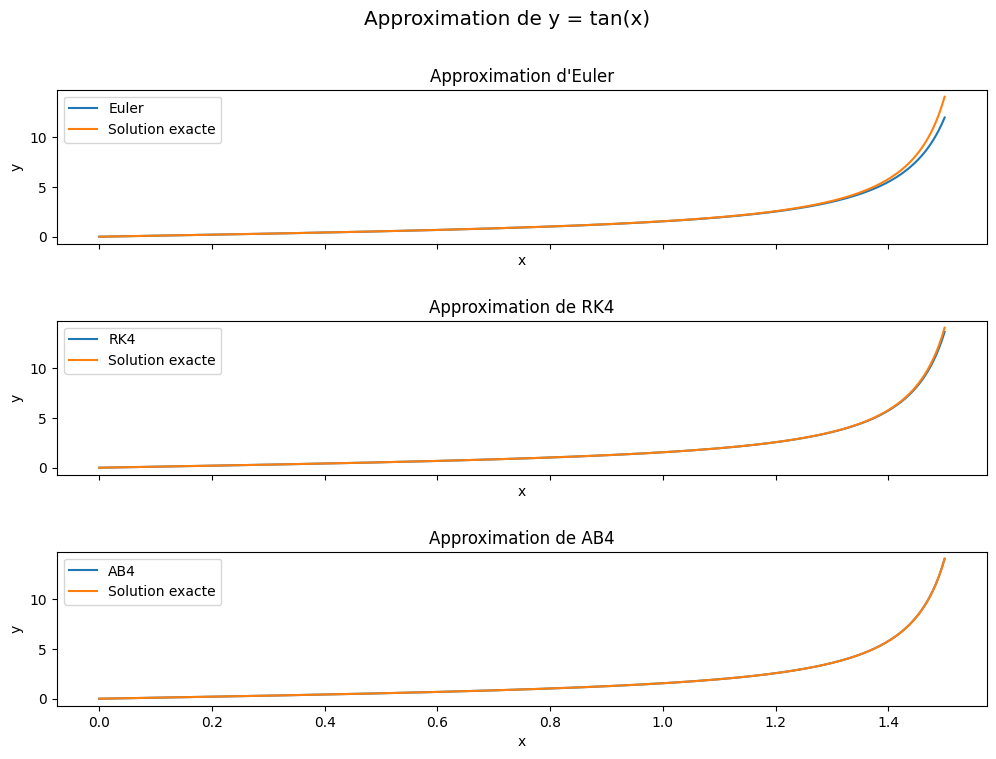

In [18]:
# Définition de l'équation differentielle
f = lambda t, y: 1 + y**2

# paramètres de resolution
x0, y0 = 0, 0
h = 0.005
N = 300

# Calcul et mesure des méthodes
X = [n*h for n in range(N+1)]

E, E_temps, E_err = mesure(euler, tan, f=f, x0=x0, y0=y0, h=h, N=N)
print(f"Euler: \n\t erreur max: {E_err:.3f} \n\t temps de calcul: {E_temps[0]:.1f} ± {E_temps[1]:.3f} {E_temps[2]}")

RK, RK_temps, RK_err = mesure(rk4, tan, f=f, x0=x0, y0=y0, h=h, N=N)
print(f"RK4: \n\t erreur max: {RK_err:.3f} \n\t temps de calcul: {RK_temps[0]:.1f} ± {RK_temps[1]:.3f} {RK_temps[2]}")

AB, AB_temps, AB_err = mesure(ab4, tan, f=f, x0=x0, y0=y0, h=h, N=N)
print(f"AB4: \n\t erreur max: {AB_err:.3f} \n\t temps de calcul: {AB_temps[0]:.1f} ± {AB_temps[1]:.3f} {AB_temps[2]}")

# Définition du graphique 
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(3, hspace=0.5)
axs = gs.subplots(sharex=True)
fig.suptitle('Approximation de y = tan(x)', fontsize="x-large")

# Graphique d'Euler
axs[0].set_title("Approximation d'Euler")
axs[0].plot(X, E, label= "Euler") 
axs[0].plot(X, [tan(x) for x in X], label="Solution exacte") 
axs[0].set_ylabel("y")
axs[0].set_xlabel("x")

# Graphique de RK
axs[1].set_title("Approximation de RK4")
axs[1].plot(X, RK, label="RK4")
axs[1].plot(X, [tan(x) for x in X], label="Solution exacte") 
axs[1].set_ylabel("y")
axs[1].set_xlabel("x")

# Graphique de AB
axs[2].set_title("Approximation de AB4")
axs[2].plot(X, AB, label="AB4")
axs[2].plot(X, [tan(x) for x in X], label="Solution exacte") 
axs[2].set_ylabel("y")
axs[2].set_xlabel("x")


# Affichage des graphiques
axs[0].legend()
axs[1].legend()
axs[2].legend()
plt.show()

On obtient avec cette méthode une approximation très proche de la solution exacte, tout en conservant un temps de calcul raisonnable 


## 2- Application - Réaction de Belousov-Zhabotinsky (BZ)

Les réactions de BZ sont un type de réactions oscillantes. Nous étudierons la suivante:
$$
    3CH_2(CO_2H)_2 + 4 BrO^−_3 \longrightarrow 4 Br^− + 9 CO_2 + 6 H_2O
$$
Les modèles qui rendent fidèlement les variations peuvent compter jusqu'à 20 réactions intermédiaires.


#### 2.1- Brusselator

Cette modélisation découpe la réaction en 4 réactions intermédiaires \(certaines espèces sont omises pour simplifier\).

\begin{gather}
    [BrO_3^-] \longrightarrow [Ce^{4+}] \\
    2[Ce^{4+}] + [Br_2] \longrightarrow 3[Ce^{4+}] \\
    [CH_2(COOH)_2] + [Br_2] \longrightarrow [Br_2] + D \\
    [Ce^{4+}] \longrightarrow [H_2O]   
\end{gather}

La cinétique, avec les changements de variables $A = [BrO_3^-]$, $B = [CH_2(COOH)_2$, $X = [Ce^{4+}]$ et $Y = [Br_2]$ ; donne:

\begin{cases}
    \frac{dX}{dt} &= A+X^2Y-BX-X \\
	\frac{dy}{dt} &= BX -X^2Y
\end{cases}



In [20]:
def rkf_2D(f, g, x0, y0, t0, hmin, hmax, eps, tmax):
    """Approximation numérique à pas variable avec la methode RKF45"""

    def _prochain():
        """Calcul des coefficients"""
        k1 = h * f(t[-1], x[-1], y[-1])
        l1 = h * g(t[-1], x[-1], y[-1])

        k2 = h * f(
            t[-1] + (1 / 4) * h, x[-1] + (1 / 4) * k1, y[-1] + (1 / 4) * l1
        )
        l2 = h * g(
            t[-1] + (1 / 4) * h, x[-1] + (1 / 4) * k1, y[-1] + (1 / 4) * l1
        )

        k3 = h * f(
            t[-1] + (3 / 8) * h,
            x[-1] + (3 / 32) * k1 + (9 / 32) * k2,
            y[-1] + (3 / 32) * l1 + (9 / 32) * l2,
        )
        l3 = h * g(
            t[-1] + (3 / 8) * h,
            x[-1] + (3 / 32) * k1 + (9 / 32) * k2,
            y[-1] + (3 / 32) * l1 + (9 / 32) * l2,
        )

        k4 = h * f(
            t[-1] + (12 / 13) * h,
            x[-1]
            + (1932 / 2197) * k1
            - (7200 / 2197) * k2
            + (7296 / 2197) * k3,
            y[-1]
            + (1932 / 2197) * l1
            - (7200 / 2197) * l2
            + (7296 / 2197) * l3,
        )
        l4 = h * g(
            t[-1] + (12 / 13) * h,
            x[-1]
            + (1932 / 2197) * k1
            - (7200 / 2197) * k2
            + (7296 / 2197) * k3,
            y[-1]
            + (1932 / 2197) * l1
            - (7200 / 2197) * l2
            + (7296 / 2197) * l3,
        )

        k5 = h * f(
            t[-1] + h,
            x[-1]
            + (439 / 216) * k1
            - 8 * k2
            + (3680 / 513) * k3
            - (845 / 4104) * k4,
            y[-1]
            + (439 / 216) * l1
            - 8 * l2
            + (3680 / 513) * l3
            - (845 / 4104) * l4,
        )
        l5 = h * g(
            t[-1] + h,
            x[-1]
            + (439 / 216) * k1
            - 8 * k2
            + (3680 / 513) * k3
            - (845 / 4104) * k4,
            y[-1]
            + (439 / 216) * l1
            - 8 * l2
            + (3680 / 513) * l3
            - (845 / 4104) * l4,
        )

        k6 = h * g(
            t[-1] + (1 / 2) * h,
            x[-1]
            - (8 / 27) * k1
            + 2 * k2
            - (3544 / 2565) * k3
            + (1859 / 4104) * k4
            - (11 / 40) * k5,
            y[-1]
            - (8 / 27) * l1
            + 2 * l2
            - (3544 / 2565) * l3
            + (1859 / 4104) * l4
            - (11 / 40) * l5,
        )
        l6 = h * f(
            t[-1] + (1 / 2) * h,
            x[-1]
            - (8 / 27) * k1
            + 2 * k2
            - (3544 / 2565) * k3
            + (1859 / 4104) * k4
            - (11 / 40) * k5,
            y[-1]
            - (8 / 27) * l1
            + 2 * l2
            - (3544 / 2565) * l3
            + (1859 / 4104) * l4
            - (11 / 40) * l5,
        )

        RK4x = (
            x[-1]
            + (25 / 216) * k1
            + (1408 / 2565) * k3
            + (2197 / 4104) * k4
            - (1 / 5) * k5
        )
        RK5x = (
            x[-1]
            + (16 / 135) * k1
            + (6656 / 12825) * k3
            + (28561 / 56430) * k4
            - (9 / 50) * k5
            + (2 / 55) * k6
        )

        RK4y = (
            y[-1]
            + (25 / 216) * l1
            + (1408 / 2565) * l3
            + (2197 / 4104) * l4
            - (1 / 5) * l5
        )
        RK5y = (
            y[-1]
            + (16 / 135) * l1
            + (6656 / 12825) * l3
            + (28561 / 56430) * l4
            - (9 / 50) * l5
            + (2 / 55) * l6
        )

        TREx = abs(RK5x - RK4x)
        TREy = abs(RK5y - RK4y)

        return (k1, k2, k3, k4, k5, k6), (l1, l2, l3, l4, l5, l6), TREx, TREy

    # Liste qui contient les point claculés
    x = [x0]
    y = [y0]
    t = [t0]

    h = hmax  # Initialisation du pas

    while t[-1] < tmax:
        if h < hmin:
            h = hmin
        if h > hmax:
            h = hmax

        K, L, TREx, TREy = _prochain()

        if TREx < eps or TREy < eps:
            h *= 2
            K, L, TREx, TREy = _prochain()

        while TREx >= eps or TREy >= eps:
            h /= 2
            K, L, TREx, TREy = _prochain()

        k1, k2, k3, k4, k5, k6 = K
        l1, l2, l3, l4, l5, l6 = L

        t.append(t[-1] + h)
        x.append(
            x[-1]
            + (25 / 216) * k1
            + (1408 / 2565) * k3
            + (2197 / 4101) * k4
            - (1 / 5) * k5
        )
        y.append(
            y[-1]
            + (25 / 216) * l1
            + (1408 / 2565) * l3
            + (2197 / 4101) * l4
            - (1 / 5) * l5
        )

    return t, x, y

In [21]:
# définition des paramètres experimentaux
A = 1
B = 5

# définition des équadiffs
f = lambda t, X, Y: A + X**2 * Y - B*X - X
g = lambda t, X, Y: B * X - X**2 * Y

# paramètres de resolution
x0 = 0
y0 = 0
t0 = 0
h = 0.1
N = 1000
RKF = rkf_2D(f, g, x0, y0, t0, h/100, h, h/10, N*h)

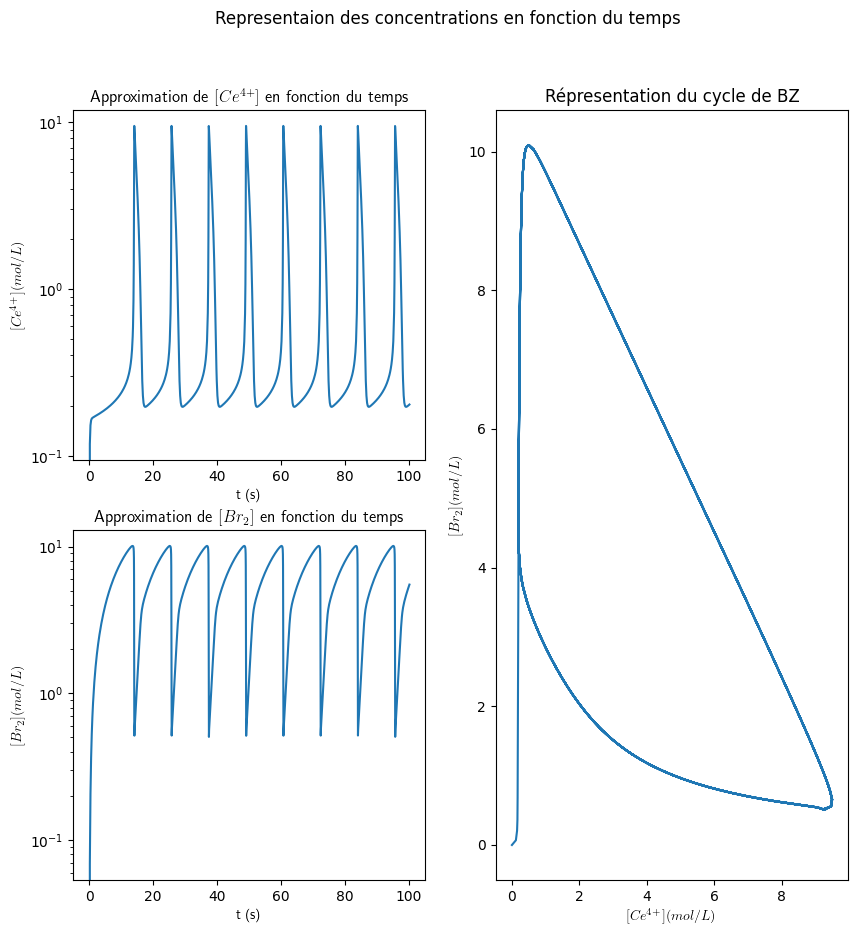

In [22]:
# Représentation graphique
# Définition des zones de tracés
fig = plt.figure(figsize=(10, 10))

axs = fig.add_subplot(2, 2, 1), fig.add_subplot(2, 2, 3), fig.add_subplot(1, 2, 2)
fig.add_gridspec(hspace=0.5)

# Tracé
axs[0].plot(RKF[0], RKF[1])
axs[0].set_ylabel("$[Ce^{4+}] (mol/L)$", usetex=True)
axs[0].set_xlabel("t (s)", usetex=True)
                 
axs[1].plot(RKF[0], RKF[2])
axs[1].set_ylabel("$[Br_2] (mol/L)$", usetex=True)
axs[1].set_xlabel("t (s)", usetex=True)

axs[2].plot(RKF[1], RKF[2])
axs[2].set_ylabel("$[Br_2] (mol/L)$", usetex=True)
axs[2].set_xlabel("$[Ce^{4+}] (mol/L)$", usetex=True)


# Tracé des axes en log
axs[0].set_yscale('log')
axs[1].set_yscale('log')

# Ecriture des titres
fig.suptitle("Representaion des concentrations en fonction du temps")
axs[0].set_title("Approximation de $[Ce^{4+}]$ en fonction du temps", usetex=True)
axs[1].set_title("Approximation de $[Br_2]$ en fonction du temps", usetex=True)
axs[2].set_title("Répresentation du cycle de BZ")
# Affichage des graphiques
plt.show()

### 2.2- Orégonator

On s'intéressera maintenant au modèle d'Oregonator, qui rend mieux compte de la réaction que le modèle de [Brusselator](#2.1--Brusselator).

Il découpe la réaction globale en 5 sous réactions simultanées \(certaines espèces sont omise pour simplifier\) avec $f$ une constante:

\begin{align*}
BrO_3^- + Br^- &\rightleftarrows HBrO_2 + HOBr\\
HBrO_2 + Br^- &\rightleftarrows 2 HOBr\\
BrO_3^- + HBrO_2  &\rightleftarrows 2 HBrO_2 + 2 Ce(IV)\\
2 HBrO_2  &\rightleftarrows BrO_3^- + HOBr \\
CHBr(COOH)_2 + Ce(IV) &\rightleftarrows \frac{1}{2}f Br^-
\end{align*}

Voici un schéma qui résume les réactions.

<img src="http://scholarpedia.org/w/images/5/5f/BZ_Core_scheme.gif" alt="drawing" width="250"/>

$BrO_3^-$, $CHBr(COOH)_2$ étant les réactifs et $HOBr$ le produit, leur concentration varie très peu sur quelques oscillations et peuvent être concidérées constantes.

En étudiant la cinétique des réactions on obtient le système, avec les variables en gras:

$$
\begin{cases}
\frac{d[HBrO_2]}{dt} &= k_1[BrO_3^-]\mathbf{[Br^-]} - k_2\mathbf{[HBrO_2][Br^-]} + k_3[BrO_3^-]\mathbf{[HBrO_2]} - 2k_4\mathbf{[HBrO_2]^2}\\
\frac{d[Br^-]}{dt} &= -k_1[BrO_3^-]\mathbf{[Br^-]} - k_2\mathbf{[HBrO_2][Br^-]} + k_c f [CH_2(COOH)_2]\mathbf{[Ce(IV)]}\\
\frac{d[Ce^{IV}]}{dt} &= 2k_3[BrO_3^-]\mathbf{[HBrO_2]} - k_c [CHBr(COOH)_2] \mathbf{[Ce(IV)]}
\end{cases}
$$

On peut montrer que ce système peut s'écrire, en prenant en compte la concentration totale en ions cérium:

$$
\begin{cases}
\epsilon\frac{d}{d\tau} &= qy -xy + (1 - \frac{z}{c_0})x - x^2\\
\epsilon'\frac{d}{d\tau} &= -qy - xy + fz\\
\frac{d}{d\tau} &= (1 - \frac{z}{c_0})x - z
\end{cases}
$$

avec $c_0 =  \frac{([Ce(III)] + [Ce(IV)])k_ck_4[CH_2(COOH)_2]}{(k_3[BrO_3^-])^2}$,$x = 2\frac{k_4[HBrO_2]}{k_3[BrO_3^-]}$,$y = \frac{k_2[Br^-]}{k_3[BrO_3^-]}$ ,$z = \frac{k_ck_4[CH_2(COOH)_2][Ce(IV)]}{k_3[BrO_3^-]}^2$ ,$\tau = k_c[CH_2(COOH)_2]t$ , $\epsilon = \frac{k_c[CH_2(COOH)_2]}{k_3[BrO_3^-]}$, $\epsilon' = \frac{2k_ck_4[CH_2(COOH)_2]}{k_2k_3[BrO_3^-]}$,$q = \frac{2k_1k_4}{k_2k_3}$ 

##### II.A- RKF

Pour résoudre ce système on créé la fonction `rkf_3D` pour la résoudre en utilisant RKF.



In [24]:
def rkf_3D(a, b, c, x0, y0, z0, t0, hmin, hmax, eps, tmax):
    """Approximation numérique à pas variable avec la methode RKF45"""

    def _prochain():
        """Calcul des coefficients"""
        last_t = t[-1]
        last_x = x[-1]
        last_y = y[-1]
        last_z = z[-1]

        k1 = h * a(last_t, last_x, last_y, last_z)
        l1 = h * b(last_t, last_x, last_y, last_z)
        m1 = h * c(last_t, last_x, last_y, last_z)

        k2 = h * a(
            last_t + 0.25 * h,
            last_x + 0.25 * k1,
            last_y + 0.25 * l1,
            last_z + 0.25 * m1,
        )
        l2 = h * b(
            last_t + 0.25 * h,
            last_x + 0.25 * k1,
            last_y + 0.25 * l1,
            last_z + 0.25 * m1,
        )
        m2 = h * c(
            last_t + 0.25 * h,
            last_x + 0.25 * k1,
            last_y + 0.25 * l1,
            last_z + 0.25 * m1,
        )

        k3 = h * a(
            last_t + 0.375 * h,
            last_x + 0.09375 * k1 + 0.28125 * k2,
            last_y + 0.09375 * l1 + 0.28125 * l2,
            last_z + 0.09375 * m1 + 0.28125 * m2,
        )
        l3 = h * b(
            last_t + 0.375 * h,
            last_x + 0.09375 * k1 + 0.28125 * k2,
            last_y + 0.09375 * l1 + 0.28125 * l2,
            last_z + 0.09375 * m1 + 0.28125 * m2,
        )
        m3 = h * c(
            last_t + 0.375 * h,
            last_x + 0.09375 * k1 + 0.28125 * k2,
            last_y + 0.09375 * l1 + 0.28125 * l2,
            last_z + 0.09375 * m1 + 0.28125 * m2,
        )

        k4 = h * a(
            last_t + (12 / 13) * h,
            last_x + (1932 / 2197) * k1 - (7200 / 2197) * k2 + (7296 / 2197) * k3,
            last_y + (1932 / 2197) * l1 - (7200 / 2197) * l2 + (7296 / 2197) * l3,
            last_z + (1932 / 2197) * m1 - (7200 / 2197) * m2 + (7296 / 2197) * m3,
        )
        l4 = h * b(
            last_t + (12 / 13) * h,
            last_x + (1932 / 2197) * k1 - (7200 / 2197) * k2 + (7296 / 2197) * k3,
            last_y + (1932 / 2197) * l1 - (7200 / 2197) * l2 + (7296 / 2197) * l3,
            last_z + (1932 / 2197) * m1 - (7200 / 2197) * m2 + (7296 / 2197) * m3,
        )
        m4 = h * c(
            last_t + (12 / 13) * h,
            last_x + (1932 / 2197) * k1 - (7200 / 2197) * k2 + (7296 / 2197) * k3,
            last_y + (1932 / 2197) * l1 - (7200 / 2197) * l2 + (7296 / 2197) * l3,
            last_z + (1932 / 2197) * m1 - (7200 / 2197) * m2 + (7296 / 2197) * m3,
        )

        k5 = h * a(
            last_t + h,
            last_x + (439 / 216) * k1 - 8 * k2 + (3680 / 513) * k3 - (845 / 4104) * k4,
            last_y + (439 / 216) * l1 - 8 * l2 + (3680 / 513) * l3 - (845 / 4104) * l4,
            last_z + (439 / 216) * m1 - 8 * m2 + (3680 / 513) * m3 - (845 / 4104) * m4,
        )
        l5 = h * b(
            last_t + h,
            last_x + (439 / 216) * k1 - 8 * k2 + (3680 / 513) * k3 - (845 / 4104) * k4,
            last_y + (439 / 216) * l1 - 8 * l2 + (3680 / 513) * l3 - (845 / 4104) * l4,
            last_z + (439 / 216) * m1 - 8 * m2 + (3680 / 513) * m3 - (845 / 4104) * m4,
        )
        m5 = h * c(
            last_t + h,
            last_x + (439 / 216) * k1 - 8 * k2 + (3680 / 513) * k3 - (845 / 4104) * k4,
            last_y + (439 / 216) * l1 - 8 * l2 + (3680 / 513) * l3 - (845 / 4104) * l4,
            last_z + (439 / 216) * m1 - 8 * m2 + (3680 / 513) * m3 - (845 / 4104) * m4,
        )

        k6 = h * a(
            last_t + 0.5 * h,
            last_x
            - (8 / 27) * k1
            + 2 * k2
            - (3544 / 2565) * k3
            + (1859 / 4104) * k4
            - (11 / 40) * k5,
            last_y
            - (8 / 27) * l1
            + 2 * l2
            - (3544 / 2565) * l3
            + (1859 / 4104) * l4
            - (11 / 40) * l5,
            last_z
            - (8 / 27) * m1
            + 2 * m2
            - (3544 / 2565) * m3
            + (1859 / 4104) * m4
            - (11 / 40) * m5,
        )
        l6 = h * b(
            last_t + 0.5 * h,
            last_x
            - (8 / 27) * k1
            + 2 * k2
            - (3544 / 2565) * k3
            + (1859 / 4104) * k4
            - (11 / 40) * k5,
            last_y
            - (8 / 27) * l1
            + 2 * l2
            - (3544 / 2565) * l3
            + (1859 / 4104) * l4
            - (11 / 40) * l5,
            last_z
            - (8 / 27) * m1
            + 2 * m2
            - (3544 / 2565) * m3
            + (1859 / 4104) * m4
            - (11 / 40) * m5,
        )
        m6 = h * c(
            last_t + 0.5 * h,
            last_x
            - (8 / 27) * k1
            + 2 * k2
            - (3544 / 2565) * k3
            + (1859 / 4104) * k4
            - (11 / 40) * k5,
            last_y
            - (8 / 27) * l1
            + 2 * l2
            - (3544 / 2565) * l3
            + (1859 / 4104) * l4
            - (11 / 40) * l5,
            last_z
            - (8 / 27) * m1
            + 2 * m2
            - (3544 / 2565) * m3
            + (1859 / 4104) * m4
            - (11 / 40) * m5,
        )

        RK4x = (
            last_x
            + (25 / 216) * k1
            + (1408 / 2565) * k3
            + (2197 / 4104) * k4
            - 0.2 * k5
        )
        RK5x = (
            last_x
            + (16 / 135) * k1
            + (6656 / 12825) * k3
            + (28561 / 56430) * k4
            - (9 / 50) * k5
            + (2 / 55) * k6
        )

        RK4y = (
            last_y
            + (25 / 216) * l1
            + (1408 / 2565) * l3
            + (2197 / 4104) * l4
            - 0.2 * l5
        )
        RK5y = (
            last_y
            + (16 / 135) * l1
            + (6656 / 12825) * l3
            + (28561 / 56430) * l4
            - (9 / 50) * l5
            + (2 / 55) * l6
        )

        RK4z = (
            last_z
            + (25 / 216) * m1
            + (1408 / 2565) * m3
            + (2197 / 4104) * m4
            - 0.2 * m5
        )
        RK5z = (
            last_z
            + (16 / 135) * m1
            + (6656 / 12825) * m3
            + (28561 / 56430) * m4
            - (9 / 50) * m5
            + (2 / 55) * m6
        )

        TREx = abs(RK5x - RK4x)
        TREy = abs(RK5y - RK4y)
        TREz = abs(RK5z - RK4z)

        return (
            (k1, k2, k3, k4, k5, k6),
            (l1, l2, l3, l4, l5, l6),
            (m1, m2, m3, m4, m5, m6),
            TREx,
            TREy,
            TREz,
        )

    # Liste qui contient les point claculés
    x = [x0]
    y = [y0]
    z = [z0]
    t = [t0]

    h = hmax  # Initialisation du pas

    while t[-1] < tmax:
        if h < hmin:
            h = hmin
        if h > hmax:
            h = hmax

        K, L, M, TREx, TREy, TREz = _prochain()

        if TREx < eps or TREy < eps or TREz < eps:
            h *= 2

        while TREx >= eps or TREy >= eps or TREz >= eps:
            h /= 2
            K, L, M, TREx, TREy, TREz = _prochain()
            if h < hmin:
                break

        k1, k2, k3, k4, k5, k6 = K
        l1, l2, l3, l4, l5, l6 = L
        m1, m2, m3, m4, m5, m6 = M

        t.append(t[-1] + h)
        x.append(
            x[-1]
            + (25 / 216) * k1
            + (1408 / 2565) * k3
            + (2197 / 4101) * k4
            - (1 / 5) * k5
        )
        y.append(
            y[-1]
            + (25 / 216) * l1
            + (1408 / 2565) * l3
            + (2197 / 4101) * l4
            - (1 / 5) * l5
        )
        z.append(
            z[-1]
            + (25 / 216) * m1
            + (1408 / 2565) * m3
            + (2197 / 4101) * m4
            - (1 / 5) * m5
        )

    return t, x, y, z

In [25]:
# Définition des paramètres experimentaux
A = 0.06
B = 0.02
H = 0.8
C0 = 1

k1 = 2 * H**2
k2 = 3e6 * H
k3 = 42 * H
k4 = 3e3 * H
kc = 1
f = 1
c0 = C0*kc*k4*B / (k3*A)**2

X0 = 4.2e-07
Y0 = 8.4e-10
Z0 = 2e-3

# paramètres de resolution
x0 = X0 * (2*k4)/(k3*A)
y0 = Y0 * k2/(k3*A)
z0 = Z0 * kc*k4*B/((k3*A)**2)
t0 = 0
h = 0.02

e1 = (kc*B)/(k3*A)
e2 = (2*kc*k4*B)/(k2*k3*A)
q = 2*k1*k4/(k2*k3)

# définition des équadiffs
a = lambda t, x, y, z: 1/e1 * (q*y -x*y + (1-z/c0)*x - x**2)
b = lambda t, x, y, z: 1/e2 * (-q*y -x*y + f*z)
c= lambda t, x, y, z: (1-z/c0)*x - z


t, x, y, z = rkf_3D(a, b, c, x0, y0, z0, t0, h/1e5, h*1e5, 0.001, 30)

# Retour du Changement de variable
T = [t_i/(kc*B) for t_i in t]
X = [k3*A/(2*k4) * x_i for x_i in x]
Y = [k3*A/(k2) * y_i for y_i in y]
Z = [((k3*A)**2)/(kc*k4*B) * z_i for z_i in z]

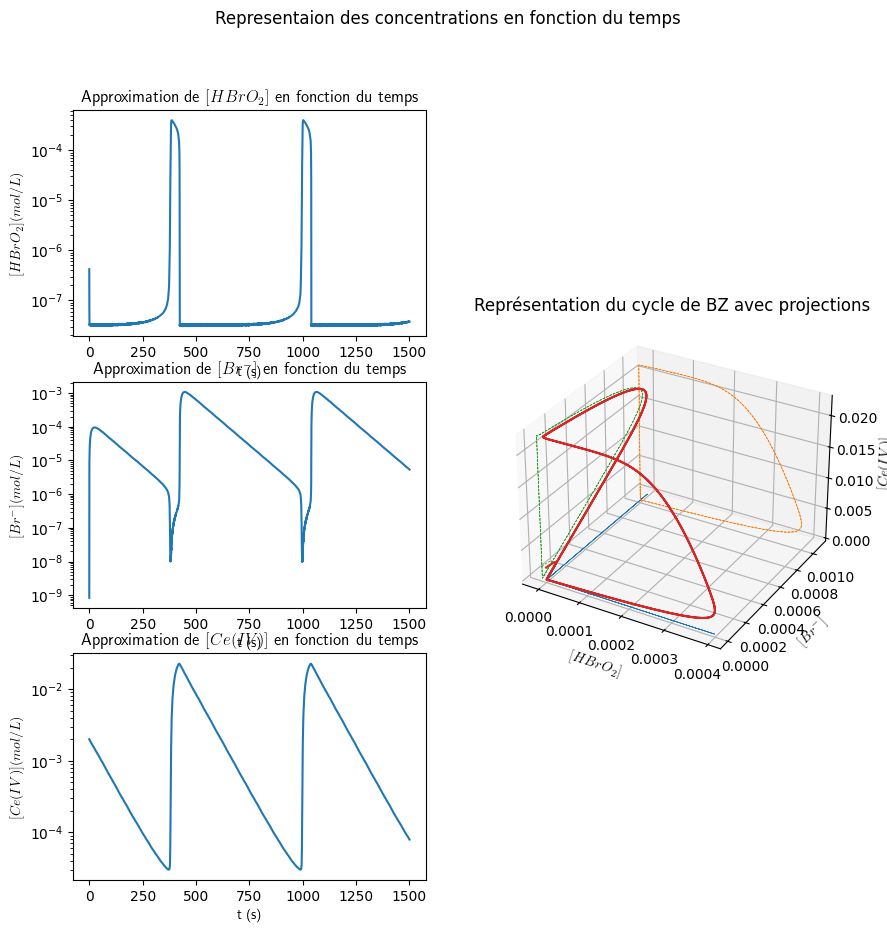

In [26]:
# Représentation graphique
# Définition des zones de tracés
fig = plt.figure(figsize=(10, 10))
axs = fig.add_subplot(3, 2, 1), fig.add_subplot(3, 2, 3), fig.add_subplot(3, 2, 5), fig.add_subplot(1, 2, 2, projection='3d')

# Tracé
axs[0].plot(T, X)
axs[0].set_ylabel("$[HBrO_2] (mol/L)$", usetex=True)
axs[0].set_xlabel("t (s)", usetex=True)

axs[1].plot(T, Y)
axs[1].set_ylabel("$[Br^-] (mol/L)$", usetex=True)
axs[1].set_xlabel("t (s)", usetex=True)

axs[2].plot(T, Z)
axs[2].set_ylabel("$[Ce(IV)] (mol/L)$", usetex=True)
axs[2].set_xlabel("t (s)", usetex=True)

# Titres
axs[3].set_xlabel("$[HBrO_2]$", usetex=True)
axs[3].set_ylabel("$[Br^-]$", usetex=True)
axs[3].set_zlabel("$[Ce(IV)]$", usetex=True)
axs[3].set_title('Représentation du cycle de BZ avec projections')

# Projections
axs[3].plot(X, Y, zs=-1e-5, zdir='z', label='curve in (x, y)', lw=0.5, linestyle="--")
axs[3].plot(X, Z, zs=1e-3, zdir='y', label='curve in (x, y)', lw=0.5, linestyle="--")
axs[3].plot(Y, Z, zs=-1e-5, zdir='x', label='curve in (x, y)', lw=0.5, linestyle="--")

# Tracés
axs[3].plot(X, Y, Z)

# Tracé des axes en log
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[2].set_yscale('log')

# Ecriture des titres
fig.suptitle("Representaion des concentrations en fonction du temps")
axs[0].set_title("Approximation de $[HBrO_2]$ en fonction du temps", usetex=True)
axs[1].set_title("Approximation de $[Br^-]$ en fonction du temps", usetex=True)
axs[2].set_title("Approximation de $[Ce(IV)]$ en fonction du temps", usetex=True)

# Affichage des graphiques
plt.show()

On repère facilement le caractère périodique de la réaction, on comprend alors le nom de réaction oscillante
On comprend aussi pourquoi ces équations différentielles peuvent être considérées comme raides.

On peut repérer un cycle 3D de réaction.



##### II.B- Comparaisons avec Euler 

Pour mettre en évidence la raideur du modèle Orégonator on effectuera les calculs numériques avec le méthode d'Euler


In [27]:
def euler_3D(a, b, c, x0, y0, z0, t0, h, N):
    X = [x0]
    Y = [y0]
    Z = [z0]
    t = t0
    for _ in range(N):
        t += h
        X.append(X[-1] + h*a(t, X[-1], Y[-1], Z[-1]))
        Y.append(Y[-1] + h*b(t, X[-1], Y[-1], Z[-1]))
        Z.append(Z[-1] + h*c(t, X[-1], Y[-1], Z[-1]))
    return (X, Y, Z)

In [28]:
# Définition des paramètres experimentaux
A = 0.06
B = 0.02
H = 0.8
C0 = 1

k1 = 2 * H**2
k2 = 3e6 * H
k3 = 42 * H
k4 = 3e3 * H
kc = 1
f = 1
c0 = C0*kc*k4*B / (k3*A)**2

X0 = 4.2e-07
Y0 = 8.4e-10
Z0 = 2e-3

# paramètres de resolution
x0 = X0 * (2*k4)/(k3*A)
y0 = Y0 * k2/(k3*A)
z0 = Z0 * kc*k4*B/((k3*A)**2)
t0 = 0
h = 0.02

e1 = (kc*B)/(k3*A)
e2 = (2*kc*k4*B)/(k2*k3*A)
q = 2*k1*k4/(k2*k3)

# définition des équadiffs
a = lambda t, x, y, z: 1/e1 * (q*y -x*y + (1-z/c0)*x - x**2)
b = lambda t, x, y, z: 1/e2 * (-q*y -x*y + f*z)
c = lambda t, x, y, z: (1-z/c0)*x - z

E = euler_3D(a, b, c, x0, y0, z0, t0, 1e-5, 2_000_000)
RKF = rkf_3D(a, b, c, x0, y0, z0, t0, h/1e5, h*1e5, 0.001, 20)

E = list(E)
E.insert(0,[1e-5*i for i in range(2_000_001)])

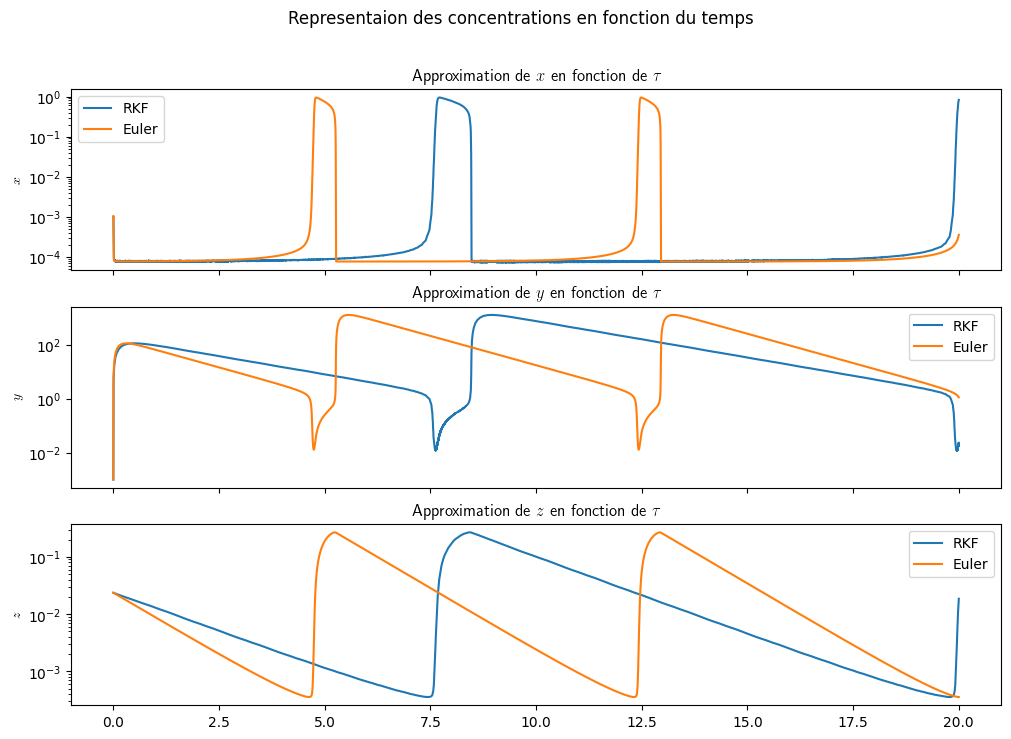

In [29]:
# Représentation graphique
# Définition des zones de tracés
fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)  # Share x-axis for efficiency

# Tracé
for i in range(3):
    axs[i].plot(RKF[0], RKF[i+1], label="RKF")
    axs[i].plot(E[0], E[i+1], label="Euler")
    axs[i].set_ylabel(f"${'xyz'[i]}$", usetex=True)
    axs[i].legend()


# Tracé des axes en log
for ax in axs:
    ax.set_yscale('log')

# Ecriture des titres
fig.suptitle("Representaion des concentrations en fonction du temps")
for i, ax in enumerate(axs):
    ax.set_title(f"Approximation de ${'xyz'[i]}$ en fonction de $\\tau$", usetex=True)

# Affichage des graphiques
plt.show()

On remarque une grande différence de période en fonctions des méthodes.

On compare aussi avec des calculs basées sur l'expérimentation.
<img src="http://scholarpedia.org/w/images/c/c3/Oscillation.jpg"  alt="http://scholarpedia.org/w/images/c/c3/Oscillation.jpg"  width="400"   style="object-fit:cover"/>

On remarque que RKF est beaucoup plus proche de la période observée qu'Euler.

